<a href="https://colab.research.google.com/github/leandrosbo/TelecomX/blob/main/TELECON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-1138139248.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
/tmp/ipython-input-1-1138139248.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({"Yes": 1, "No": 0})
/tmp/ipython-input-1-1138139248.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Análise concluída. Arquivo salvo como TelecomX_Dados_Limpos.csv


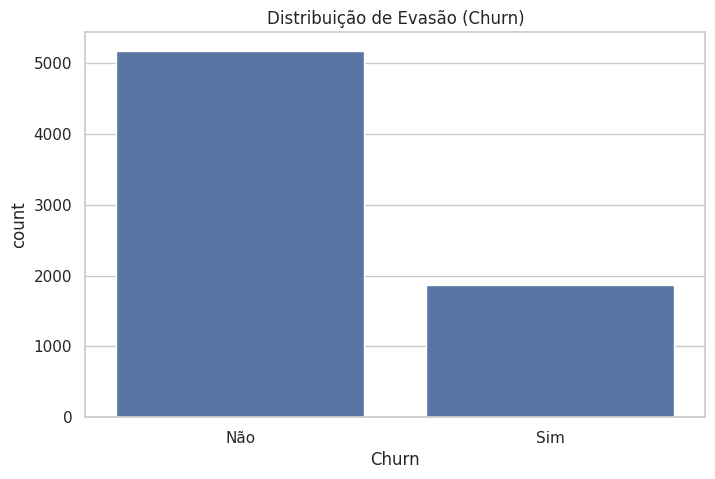

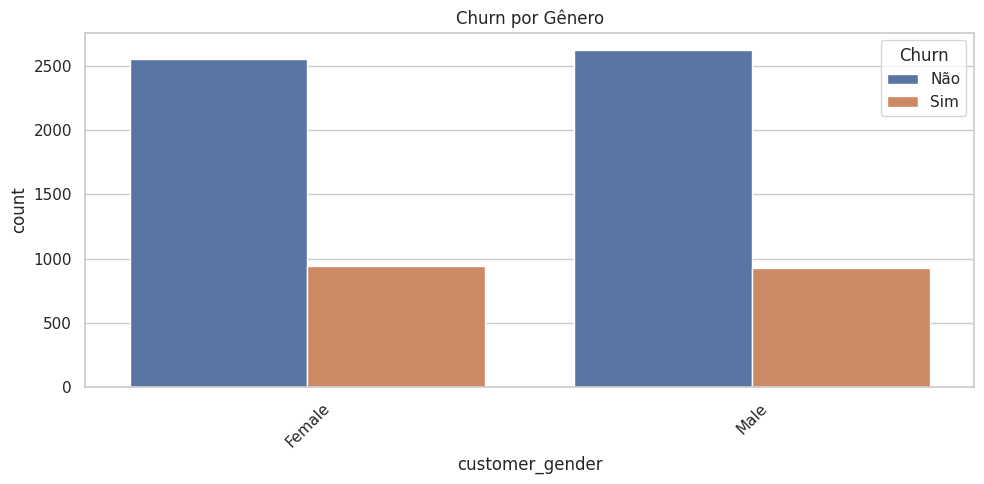

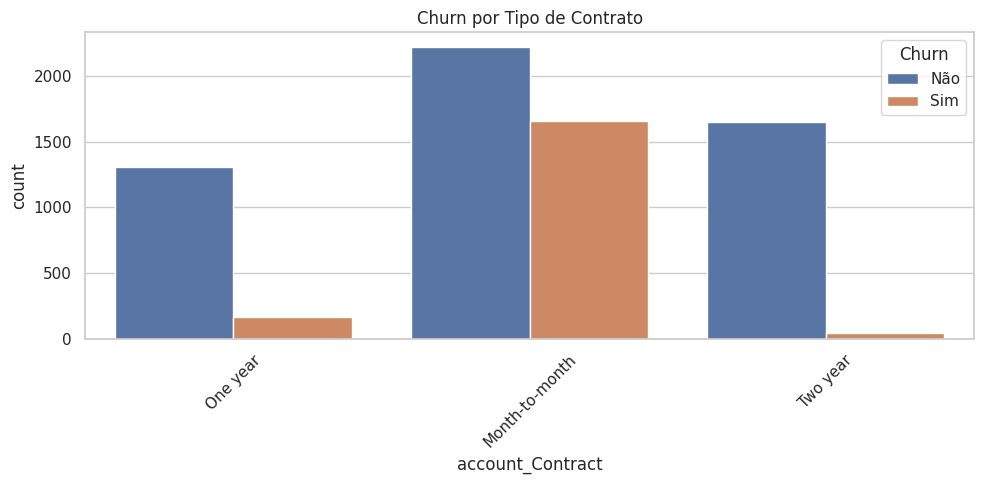

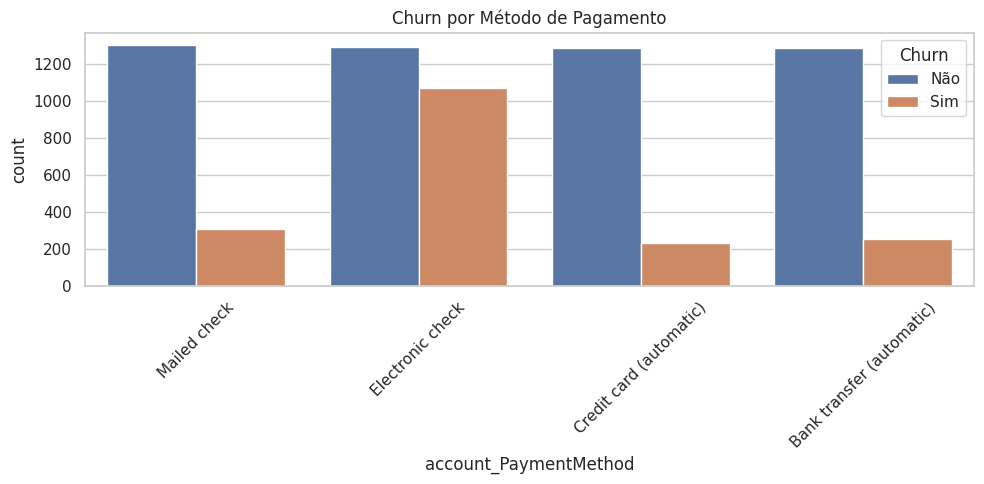

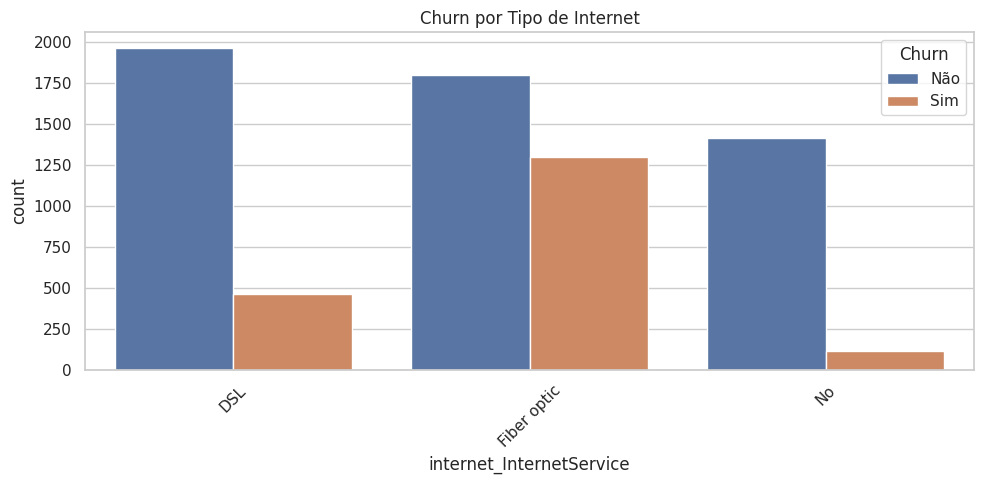

In [1]:
# telecom_churn_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# =======================
# 1. Carregamento dos Dados
# =======================
with open("TelecomX_Data.json", "r") as file:
    raw_data = json.load(file)

df = pd.json_normalize(raw_data, sep="_")

# =======================
# 2. Limpeza e Transformação
# =======================
df["account_Charges_Monthly"] = pd.to_numeric(df["account_Charges_Monthly"], errors="coerce")
df["account_Charges_Total"] = pd.to_numeric(df["account_Charges_Total"], errors="coerce")
df["Contas_Diarias"] = df["account_Charges_Monthly"] / 30

df["Churn"] = df["Churn"].replace("", pd.NA)
df = df.dropna(subset=["Churn"])
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Binárias em 0 e 1
bin_cols = [
    "customer_Partner", "customer_Dependents", "phone_PhoneService",
    "phone_MultipleLines", "account_PaperlessBilling"
]
for col in bin_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# =======================
# 3. Análise Exploratória
# =======================
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x="Churn", data=df)
plt.title("Distribuição de Evasão (Churn)")
plt.xticks([0, 1], ["Não", "Sim"])
plt.savefig("grafico_churn.png")

# Gráficos categóricos
def churn_barplot(col, title, filename):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title="Churn", labels=["Não", "Sim"])
    plt.tight_layout()
    plt.savefig(filename)

churn_barplot("customer_gender", "Churn por Gênero", "churn_genero.png")
churn_barplot("account_Contract", "Churn por Tipo de Contrato", "churn_contrato.png")
churn_barplot("account_PaymentMethod", "Churn por Método de Pagamento", "churn_pagamento.png")
churn_barplot("internet_InternetService", "Churn por Tipo de Internet", "churn_internet.png")

# =======================
# 4. Exportação Final
# =======================
df.to_csv("TelecomX_Dados_Limpos.csv", index=False)
print("Análise concluída. Arquivo salvo como TelecomX_Dados_Limpos.csv")
